# Code

In [ ]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()
#print(max_payload)
# Create a dash application
app = dash.Dash(__name__)


#Dropdown lables
lables = []
lables.append({'label': 'All Sites', 'value': 'ALL'})

for site in spacex_df["Launch Site"].unique():
   # print(str(site))
    lable = {}
    lable["label"] = site
    lable["value"] = site
    lables.append(lable)

#print(lables)
# Create an app layout
app.layout = html.Div(children=
                      [html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                dcc.Dropdown(id='site-dropdown',options=lables,
                                            value='ALL',
                                            placeholder="place holder here",
                                            searchable=True
                                            ),
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                dcc.RangeSlider(id='payload-slider',
                                                    min=0, max=10000, step=1000,
                                                    marks={0: '0',
                                                        100: '100'},
                                                    value=[min_payload, max_payload]),

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])
                            
# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
# Function decorator to specify function input and output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
              Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    print(entered_site)
    filtered_df = spacex_df
    if entered_site == 'ALL':
        fig = px.pie(filtered_df, values='class', 
        names='Launch Site', 
        title='Total Success Launches by Site')
        return fig
    else:
        # return the outcomes piechart for a selected site
        filtered_df = filtered_df[filtered_df['Launch Site']==entered_site]
        print(filtered_df.head(3))
        filtered_df = filtered_df.groupby(["Launch Site", "class"]).size().reset_index(name='class count')
        print(filtered_df.head())
        fig = px.pie(filtered_df, values='class count', 
        names='class count', 
        title='Total Success Launches for '+ entered_site)
        return fig
# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(Output(component_id='success-payload-scatter-chart', component_property='figure'), 
              [Input(component_id='site-dropdown', component_property='value'), Input(component_id="payload-slider", component_property="value")])
def scatter(entered_site,payload):
    filtered_df = spacex_df[spacex_df['Payload Mass (kg)'].between(payload[0],payload[1])]
    # thought reusing filtered_df may cause issues, but tried it out of curiosity and it seems to be working fine
    
    if entered_site=='ALL':
        fig=px.scatter(filtered_df,x='Payload Mass (kg)',y='class',color='Booster Version Category',title='Success count on Payload mass for all sites')
        return fig
    else:
        fig=px.scatter(filtered_df[filtered_df['Launch Site']==entered_site],x='Payload Mass (kg)',y='class',color='Booster Version Category',title=f"Success count on Payload mass for site {entered_site}")
        return fig
# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


# Dashboard Screeshots

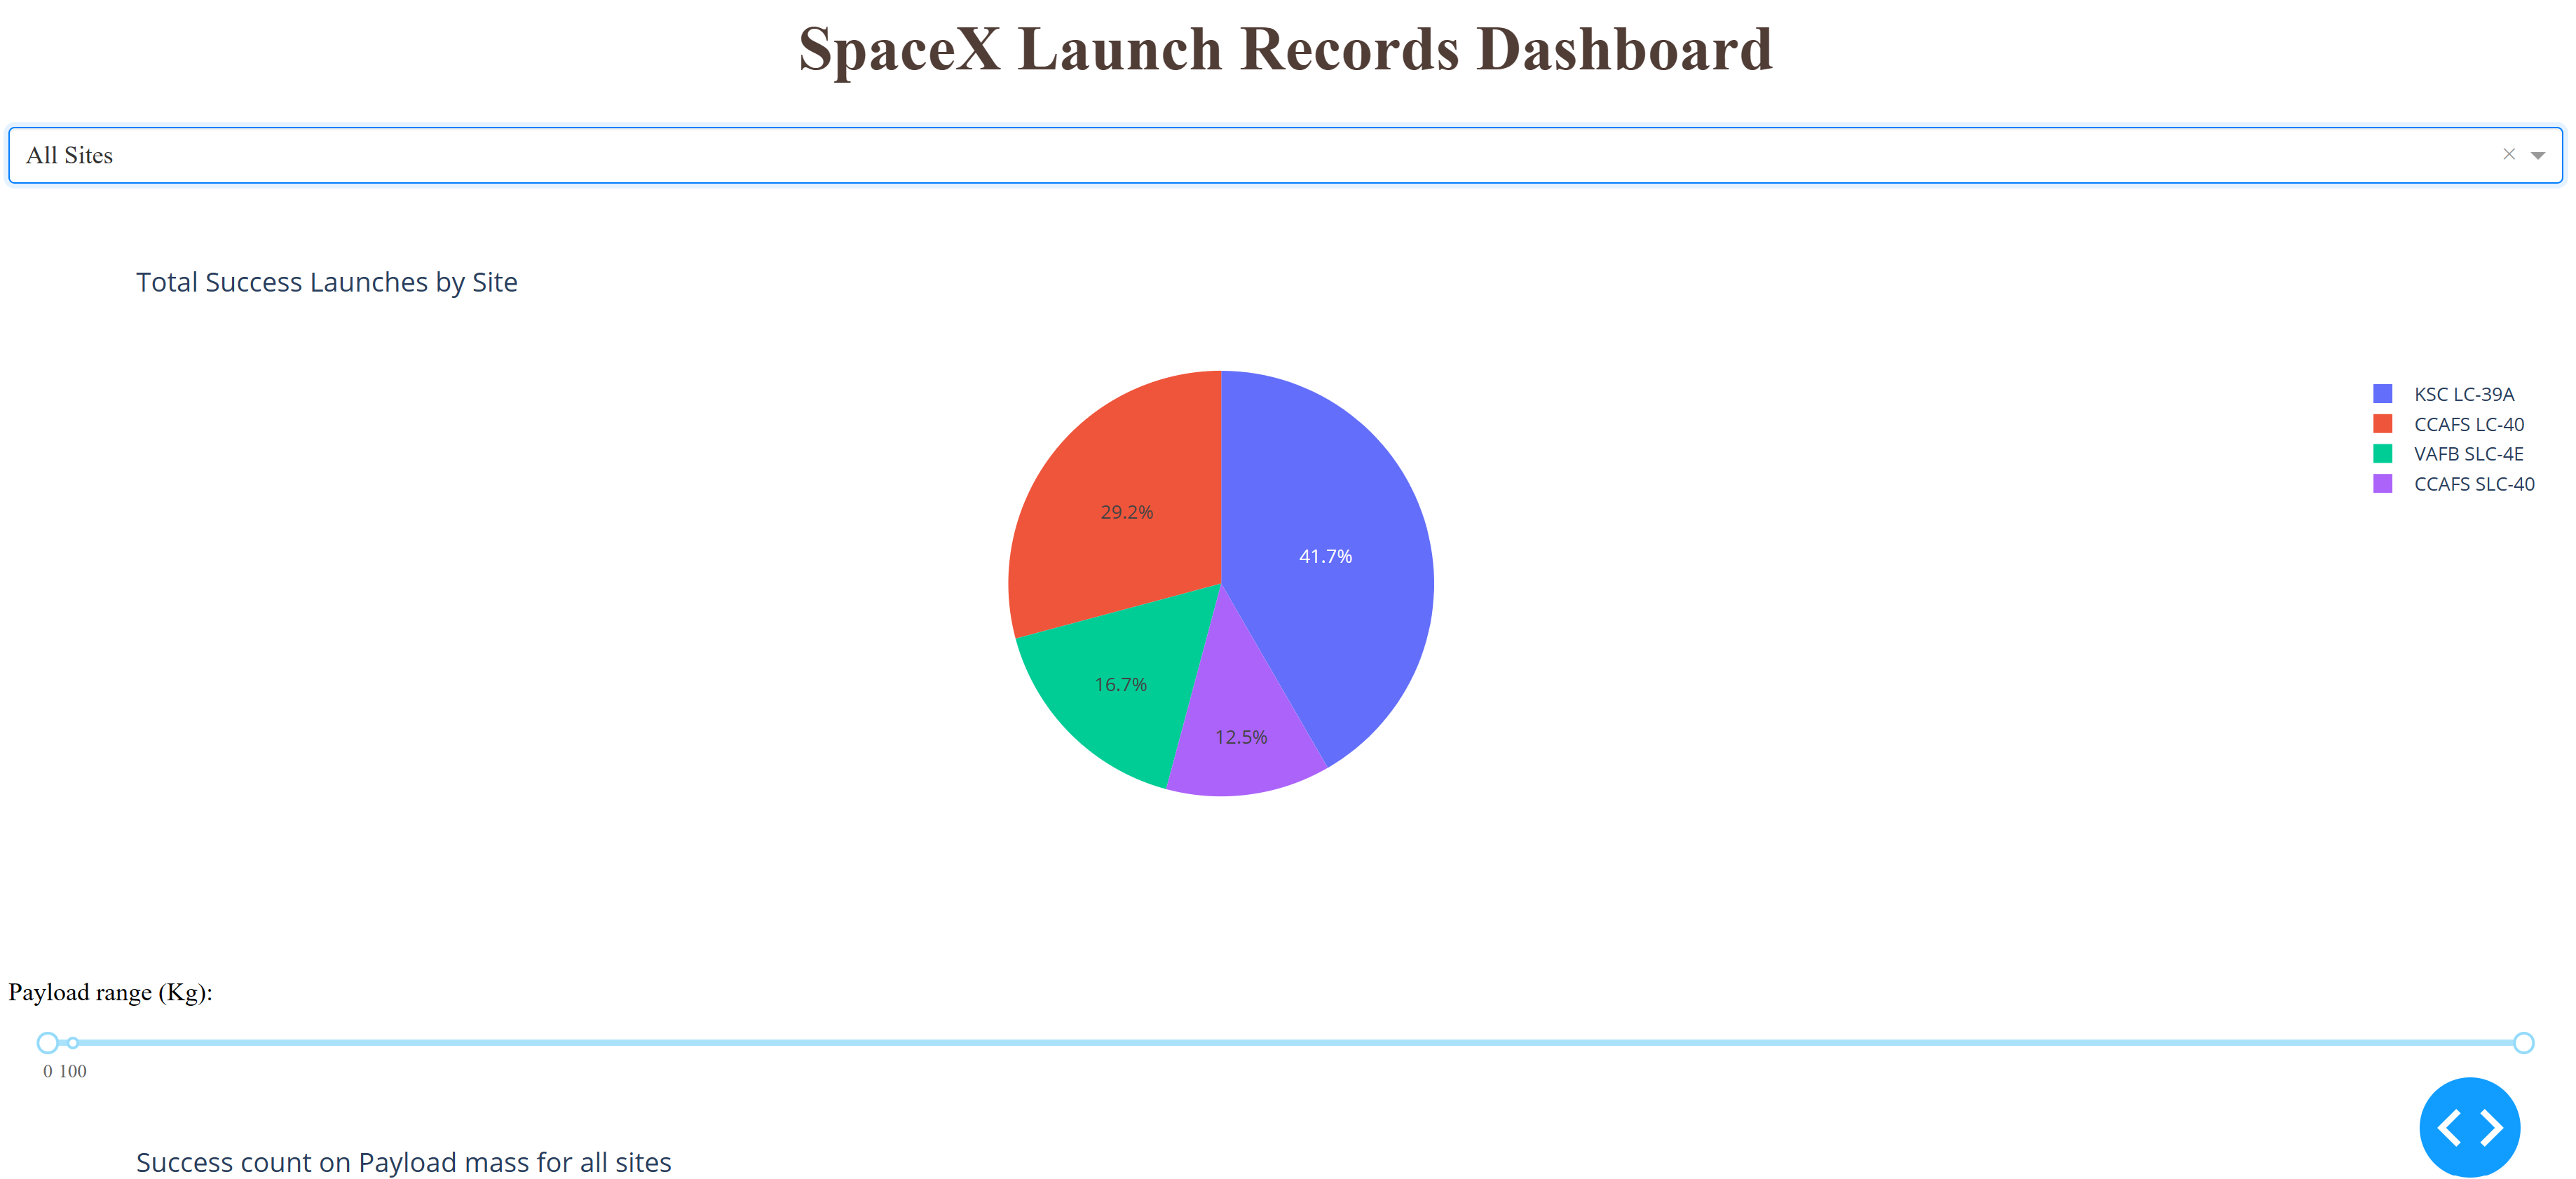

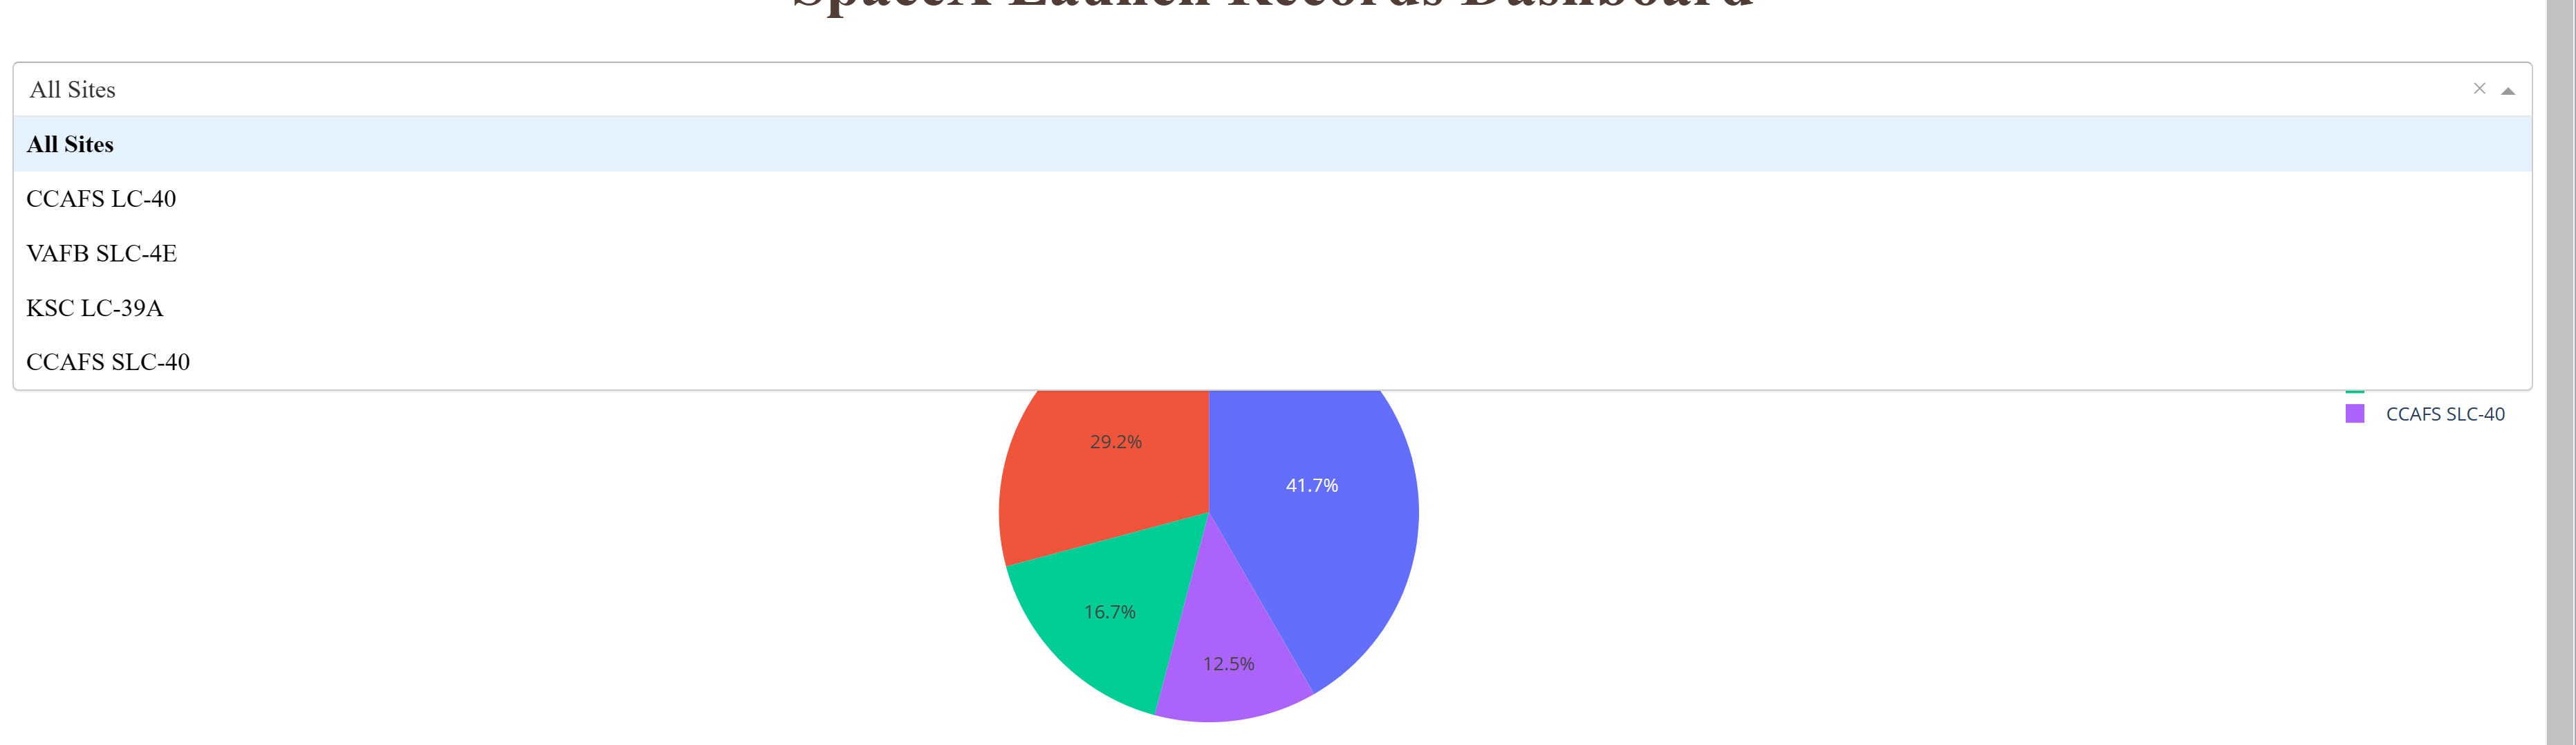

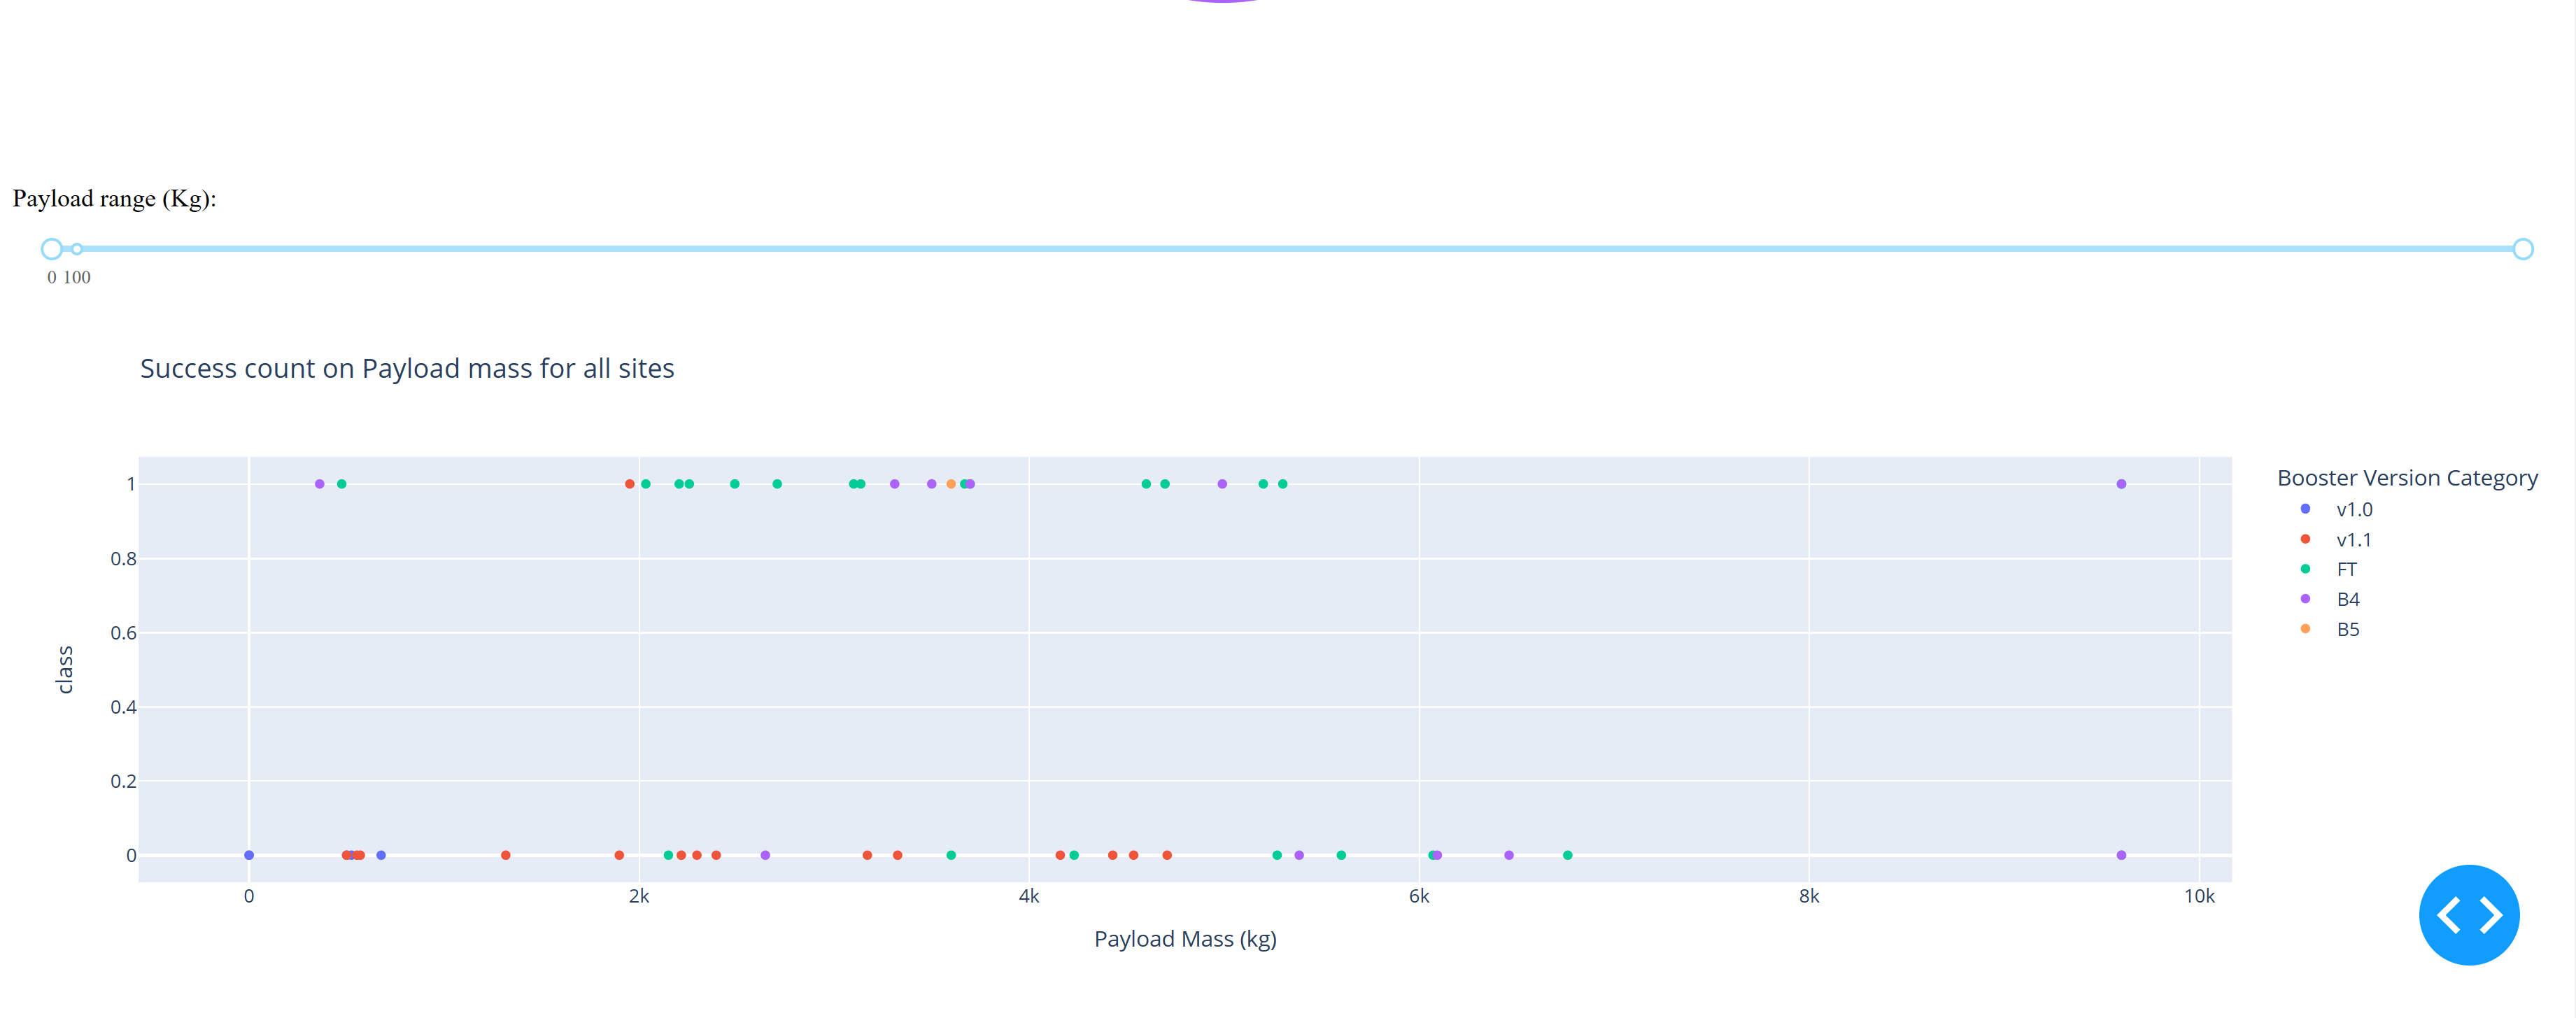